In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# numbers of folders : 7554 - 7574 

In [54]:
f = open("task4_train/7554/SimpleTest/1.csv")

In [55]:
df=pd.read_csv(f)

In [56]:
df=df.dropna()

In [57]:
df

,X,Y,Pressure,TiltX,TiltY,Time
0,925.902760133965,665.541979,0.045884,-4917.0,669.0,00:12.6099853
1,925.902760133965,665.541979,0.045884,-4917.0,669.0,00:12.6256038
2,926.692689687031,665.647303,0.082506,-4917.0,669.0,00:12.6445684
3,927.008661508257,665.647303,0.115953,-4917.0,669.0,00:12.6602735
4,927.324633329484,665.594641,0.140368,-4917.0,669.0,00:12.6838147
...,...,...,...,...,...,...
127,585.495784732648,647.004966,0.378408,-4510.0,1946.0,00:14.0316787
128,584.863841090195,646.846980,0.382803,-4510.0,1946.0,00:14.0472865
129,584.863841090195,646.846980,0.386954,-4510.0,1946.0,00:14.0629098
130,584.653193209377,646.741656,0.386954,-4501.0,1991.0,00:14.0785335


In [58]:
df.columns

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')

In [61]:
df

,X,Y,Pressure,TiltX,TiltY,Time
0,925.902760,665.541979,0.045884,-4917.0,669.0,00:12.6099853
1,925.902760,665.541979,0.045884,-4917.0,669.0,00:12.6256038
2,926.692690,665.647303,0.082506,-4917.0,669.0,00:12.6445684
3,927.008662,665.647303,0.115953,-4917.0,669.0,00:12.6602735
4,927.324633,665.594641,0.140368,-4917.0,669.0,00:12.6838147
...,...,...,...,...,...,...
127,585.495785,647.004966,0.378408,-4510.0,1946.0,00:14.0316787
128,584.863841,646.846980,0.382803,-4510.0,1946.0,00:14.0472865
129,584.863841,646.846980,0.386954,-4510.0,1946.0,00:14.0629098
130,584.653193,646.741656,0.386954,-4501.0,1991.0,00:14.0785335


In [64]:
df['X']=df['X'].astype(float)
df[' Y']=df[' Y'].astype(float)

In [75]:
max(df['X'])

927.324633329484

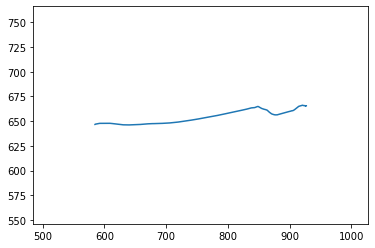

In [87]:

# in order to see the image from afar, i.e the whole drawing, we need to put limits
plt.xlim(min(df['X'])-100,max(df['X'])+100)
plt.ylim(min(df[' Y'])-100,max(df[' Y'])+100)
plt.plot(df['X'],df[' Y'])
# plt.scatter(df['X'],df[' Y'],df[' Time'])
plt.show()

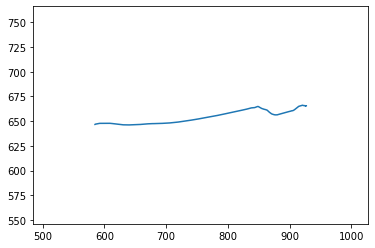

In [88]:
plt.xlim(min(df['X'])-100,max(df['X'])+100)
plt.ylim(min(df[' Y'])-100,max(df[' Y'])+100)
plt.plot(df['X'],df[' Y'])
# plt.scatter(df['X'],df[' Y'],df[' Time'])
plt.show()

In [81]:
# x = df['X']
# y = df[' Y']

# fig = plt.figure()
# plt.xlim(float(df['X'].min())-100 , float(df['X'].max()) + 100)
# plt.ylim(float(df[' Y'].min())-100 , float(df[' Y'].max()) + 100)
# graph, = plt.plot([], [], 'o' ,markersize=8)
# plt.gca().invert_yaxis()
# def animate(i):
#     graph.set_data(x[:i+1], y[:i+1])
#     return graph

# ani = FuncAnimation(
# fig, animate, frames=len(df), interval=10)
# plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'int'

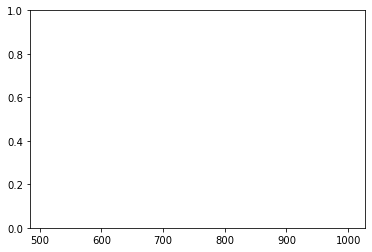

In [91]:
plt.xlim(min(df['X'])-100,max(df['X'])+100)
plt.ylim(min(df[' Time'])-100,max(df[' Time'])+100)
# plt.plot(df['X'],df[' Y'])

plt.scatter(df['X'],df[' Time'])

plt.show()



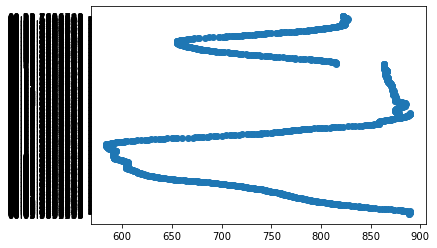

In [24]:
plt.scatter(df[' Y'],df[' Time'])
# plt.scatter(df['X'],df[' Y'],df[' Time'])
plt.show()


In [15]:
l=df['X'].min()

In [16]:
float(l)

641.633444970551

In [26]:
# animation function - recreation of the drawing
# def FuncAnimation(fig, animate, frames, interval):
#     x = df['X']
#     y = df[' Y']

#     fig = plt.figure()

#     plt.xlim(float(df['X'].min())-100 , float(df['X'].max()) + 100)
#     plt.ylim(float(df[' Y'].min())-100 , float(df[' Y'].max()) + 100)
#     graph, = plt.plot([], [], 'o' ,markersize=8)
#     plt.gca().invert_yaxis()
# def animate(i):
#     graph.set_data(x[:i+1], y[:i+1])
#     return graph

# ani = FuncAnimation(
# fig, animate, frames=len(df), interval=10)
# plt.show()

In [ ]:
f

In [22]:
# function that imports each table from a specific folder and creates a data frame for each folder
def import_tables2(num_folder):
    main_df = {}
    for num_table in range (1,22):
#         print()
#         print("table number:",num_table)
#         print()
        f= open('task4_train'+'/'+num_folder+'/SimpleTest/'+str(num_table)+'.csv')
        df=pd.read_csv(f)
        df=df.dropna()
        tempx=df['X']
        tempy=df[' Y']
        main_df[num_table]=df

    return main_df
    
 #   ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

In [23]:
df1=import_tables2('7554')
df2=import_tables2('7556')
df3=import_tables2('7557')
df4=import_tables2('7558')
df5=import_tables2('7559')
df6=import_tables2('7560')
df7=import_tables2('7561')
df8=import_tables2('7563')
df9=import_tables2('7569')
df10=import_tables2('7570')
df11=import_tables2('7571')
df12=import_tables2('7572')
df13=import_tables2('7573')
df14=import_tables2('7574')

In [24]:
df1

{1:                     X           Y   Pressure   TiltX   TiltY           Time
 0    925.902760133965  665.541979   0.045884 -4917.0   669.0  00:12.6099853
 1    925.902760133965  665.541979   0.045884 -4917.0   669.0  00:12.6256038
 2    926.692689687031  665.647303   0.082506 -4917.0   669.0  00:12.6445684
 3    927.008661508257  665.647303   0.115953 -4917.0   669.0  00:12.6602735
 4    927.324633329484  665.594641   0.140368 -4917.0   669.0  00:12.6838147
 ..                ...         ...        ...     ...     ...            ...
 127  585.495784732648  647.004966   0.378408 -4510.0  1946.0  00:14.0316787
 128  584.863841090195  646.846980   0.382803 -4510.0  1946.0  00:14.0472865
 129  584.863841090195  646.846980   0.386954 -4510.0  1946.0  00:14.0629098
 130  584.653193209377  646.741656   0.386954 -4501.0  1991.0  00:14.0785335
 131  584.653193209377  646.741656   0.389151 -4501.0  1991.0  00:14.0941464
 
 [132 rows x 6 columns],
 2:                     X           Y   Pressu

In [25]:
df1[1]

,X,Y,Pressure,TiltX,TiltY,Time
0,925.902760133965,665.541979,0.045884,-4917.0,669.0,00:12.6099853
1,925.902760133965,665.541979,0.045884,-4917.0,669.0,00:12.6256038
2,926.692689687031,665.647303,0.082506,-4917.0,669.0,00:12.6445684
3,927.008661508257,665.647303,0.115953,-4917.0,669.0,00:12.6602735
4,927.324633329484,665.594641,0.140368,-4917.0,669.0,00:12.6838147
...,...,...,...,...,...,...
127,585.495784732648,647.004966,0.378408,-4510.0,1946.0,00:14.0316787
128,584.863841090195,646.846980,0.382803,-4510.0,1946.0,00:14.0472865
129,584.863841090195,646.846980,0.386954,-4510.0,1946.0,00:14.0629098
130,584.653193209377,646.741656,0.386954,-4501.0,1991.0,00:14.0785335


In [134]:
# function for visualisation of each table in the specific folder
def import_tables(num_folder):
    for num_table in range (1,21):
        print()
        print("table number:",num_table)
        print()
        f= open('task4_train'+'/'+num_folder+'/SimpleTest/'+str(num_table)+'.csv')
        df=pd.read_csv(f)
        df=df.dropna()
        tempx=df['X']
        tempy=df[' Y']
        plt.scatter(tempx,tempy)
       # plt.axes(xlim=(min(tempx), max(tempx)), ylim=(min(tempy), max(tempy)))
        #ax.set()
#         array= [min(tempx), max(tempx), min(tempy), max(tempy)]
#         array=np.array(array, dtype=float)

#         plt.axes(array)
        plt.show()
        print(df)
#         df=pd.read_csv('task4_train'+'\ '+num_folder+'\SimpleTest'+str(num_table)+'.csv')
#         f = open("task4_train/7554/SimpleTest/9.csv") ///// working well!
    
    
 #   ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))


table number: 1



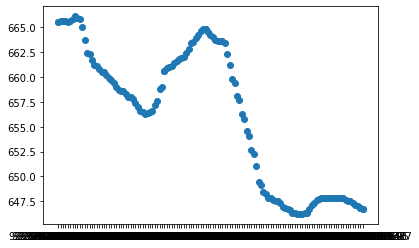

                    X           Y   Pressure   TiltX   TiltY           Time
0    925.902760133965  665.541979   0.045884 -4917.0   669.0  00:12.6099853
1    925.902760133965  665.541979   0.045884 -4917.0   669.0  00:12.6256038
2    926.692689687031  665.647303   0.082506 -4917.0   669.0  00:12.6445684
3    927.008661508257  665.647303   0.115953 -4917.0   669.0  00:12.6602735
4    927.324633329484  665.594641   0.140368 -4917.0   669.0  00:12.6838147
..                ...         ...        ...     ...     ...            ...
127  585.495784732648  647.004966   0.378408 -4510.0  1946.0  00:14.0316787
128  584.863841090195  646.846980   0.382803 -4510.0  1946.0  00:14.0472865
129  584.863841090195  646.846980   0.386954 -4510.0  1946.0  00:14.0629098
130  584.653193209377  646.741656   0.386954 -4501.0  1991.0  00:14.0785335
131  584.653193209377  646.741656   0.389151 -4501.0  1991.0  00:14.0941464

[132 rows x 6 columns]

table number: 2



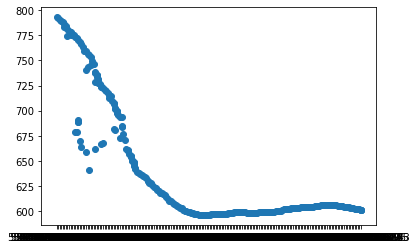

                    X           Y   Pressure   TiltX   TiltY           Time
0    538.995265042153  793.141933   0.007797 -5564.0  -521.0  00:05.5315422
1    539.153250952766  792.246680   0.007797 -5564.0  -521.0  00:05.5471346
2    539.943180505832  789.929553   0.007797 -5564.0  -521.0  00:05.5627578
3    540.417138237672  789.034300   0.007797 -5564.0  -521.0  00:05.5784554
4    540.733110058898  788.139046   0.007797 -5564.0  -521.0  00:05.5941499
..                ...         ...        ...     ...     ...            ...
242  702.089386765215  601.873657   0.382315 -4986.0   230.0  00:08.3713049
243  702.773992377873  601.347038   0.374258 -4986.0   230.0  00:08.3713049
244  702.773992377873  601.347038   0.371084 -4986.0   230.0  00:08.3869325
245  702.773992377873  601.347038   0.367910 -4986.0   230.0  00:08.4025636
246  702.773992377873  601.347038   0.341299 -4986.0   230.0  00:08.4181763

[247 rows x 6 columns]

table number: 3



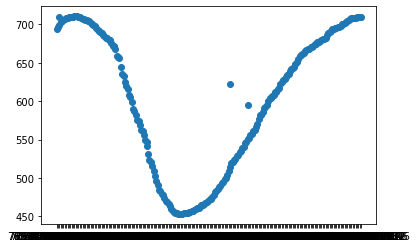

                    X           Y   Pressure   TiltX   TiltY           Time
0    765.705046772145  694.400739   0.057603 -4398.0   693.0  00:07.3360831
1    763.703891904377  697.191824   0.060533 -4398.0   693.0  00:07.3516977
2    762.176694768449  699.561612   0.090806 -4398.0   693.0  00:07.3829451
3     759.80690610925  702.879316   0.154040 -4398.0   693.0  00:07.3986387
4    758.437694883936  704.143204   0.176257 -4398.0   693.0  00:07.4141981
..                ...         ...        ...     ...     ...            ...
223  764.125187666012  709.040767   0.472160 -3801.0   841.0  00:09.7686524
224  762.176694768449  709.462063   0.464347 -3801.0   841.0  00:09.7998921
225  761.544751125996  709.620049   0.452628 -3801.0   841.0  00:09.7998921
226   761.22877930477  709.725372   0.446525 -3801.0   841.0  00:09.8155120
227  759.754244139046  710.199330   0.222889 -3801.0   841.0  00:09.8155120

[228 rows x 6 columns]

table number: 4



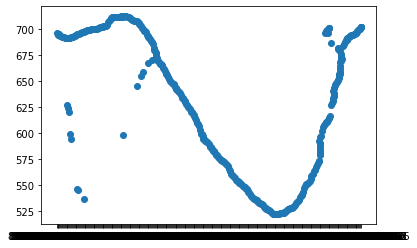

                    X           Y   Pressure   TiltX   TiltY           Time
0    847.805058320822  696.243908   0.058579 -4762.0   723.0  00:07.4715108
1    848.068368171844  696.085922   0.061509 -4762.0   723.0  00:07.4871337
2    848.437001963275  695.769950   0.065415 -4762.0   723.0  00:07.5028896
3    848.437001963275  695.769950   0.086412 -4762.0   723.0  00:07.5183749
4    848.437001963275  695.769950   0.159655 -4762.0   723.0  00:07.5339944
..                ...         ...        ...     ...     ...            ...
404  837.220002309735  702.247373   0.719234 -4148.0   889.0  00:11.9926556
405  837.220002309735  702.510683   0.714351 -4148.0   889.0  00:12.0239232
406  837.220002309735  702.510683   0.708492 -4148.0   889.0  00:12.0395151
407  837.220002309735  701.931401   0.628656 -4148.0   889.0  00:12.0551384
408  836.166762905647  696.191246   0.293935 -4148.0   889.0  00:12.0551384

[409 rows x 6 columns]

table number: 5



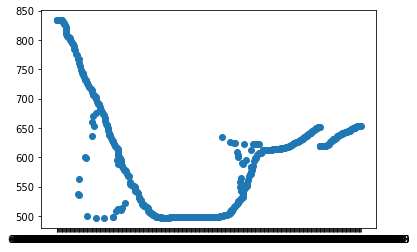

                    X           Y   Pressure   TiltX   TiltY           Time
0    608.351079801363  833.323017   0.107164 -3848.0  -644.0  00:02.7272871
1    608.877699503407  833.165031   0.107164 -3848.0  -644.0  00:02.7429109
2    608.877699503407  833.165031   0.099107 -3848.0  -644.0  00:02.7585749
3     609.03568541402  833.323017   0.107652 -3959.0  -670.0  00:02.7741475
4    608.719713592794  833.586326   0.129381 -4059.0  -694.0  00:02.7898665
..                ...         ...        ...     ...     ...            ...
498  686.132809793279  654.061670   0.507561 -3717.0  1573.0  00:16.4421005
499  686.132809793279  654.061670   0.507561 -3717.0  1573.0  00:16.4578282
500  686.132809793279  654.061670   0.507561 -3717.0  1573.0  00:16.4733589
501  686.132809793279  654.061670   0.490227 -3717.0  1573.0  00:16.4891290
502  686.448781614505  653.903684   0.478019 -3717.0  1573.0  00:16.5046050

[503 rows x 6 columns]

table number: 6



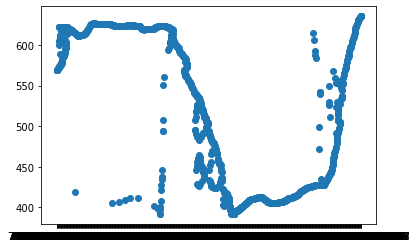

                     X           Y   Pressure   TiltX   TiltY           Time
0     758.016399122301  569.381222   0.088853 -4282.0  2245.0  00:02.7042668
1     758.069061092505  569.170574   0.108629 -4282.0  2245.0  00:02.7198912
2     758.069061092505  569.170574   0.141833 -4011.0  2058.0  00:02.7355150
3     758.069061092505  569.170574   0.170397 -3961.0  2025.0  00:02.7511401
4     758.069061092505  569.170574   0.186267 -3961.0  2025.0  00:02.7667508
...                ...         ...        ...     ...     ...            ...
1104  779.291835084883  635.577318   0.761227 -3373.0  1415.0  00:15.7094726
1105  779.291835084883  635.577318   0.754391 -3373.0  1415.0  00:15.7251581
1106  779.291835084883  635.577318   0.745113 -3373.0  1415.0  00:15.7251581
1107  779.291835084883  635.577318   0.737301 -3373.0  1415.0  00:15.7408486
1108  779.291835084883  635.577318   0.711910 -3373.0  1415.0  00:15.7564239

[1109 rows x 6 columns]

table number: 7



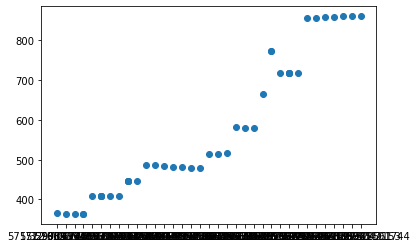

                   X           Y   Pressure   TiltX   TiltY           Time
0   571.329714747661  364.894792   0.190661 -3352.0  2845.0  00:02.2408653
1    571.90899641991  364.578820   0.202380 -3352.0  2845.0  00:02.2564937
2   572.909573853794  363.894214   0.237781 -3352.0  2845.0  00:02.2721532
3   573.067559764407  363.736228   0.239979 -3352.0  2845.0  00:02.2878658
4   573.067559764407  363.736228   0.230701 -3352.0  2845.0  00:02.2878658
5    619.77872733572  409.710128   0.260487 -4405.0  2788.0  00:03.0222758
6   620.200023097355  409.288832   0.276600 -4405.0  2788.0  00:03.0378670
7   620.200023097355  409.288832   0.268055 -4276.0  2682.0  00:03.0535995
8   620.200023097355  409.288832   0.277577 -4102.0  2544.0  00:03.0691185
9   620.200023097355  409.288832   0.282460 -4102.0  2544.0  00:03.0847513
10  619.726065365516  408.972861   0.282460 -4102.0  2544.0  00:03.1004349
11  618.936135812449  408.867537   0.207263 -4102.0  2544.0  00:03.1159844
12  667.806444162143  446

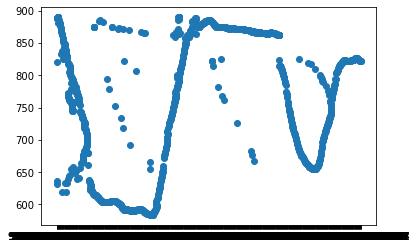

                     X           Y   Pressure   TiltX   TiltY           Time
0     910.472802864072  888.302113   0.094224 -3875.0  -351.0  00:05.8895936
1     910.472802864072  888.302113   0.099107 -3875.0  -351.0  00:05.9052263
2     910.472802864072  888.302113   0.123278 -3875.0  -351.0  00:05.9208500
3     910.472802864072  888.302113   0.129137 -3875.0  -351.0  00:05.9364735
4     909.840859221619  888.460099   0.137926 -3875.0  -351.0  00:05.9521633
...                ...         ...        ...     ...     ...            ...
1178  870.186395657697  822.264003   0.685542 -3761.0   823.0  00:23.7650398
1179  870.449705508719  822.264003   0.685542 -3761.0   823.0  00:23.7650398
1180  870.449705508719  822.264003   0.682368 -3761.0   823.0  00:23.7806749
1181  870.449705508719  822.264003   0.673579 -3761.0   823.0  00:23.7806749
1182  870.713015359741  822.369327   0.644038 -3761.0   823.0  00:23.7806749

[1183 rows x 6 columns]

table number: 9



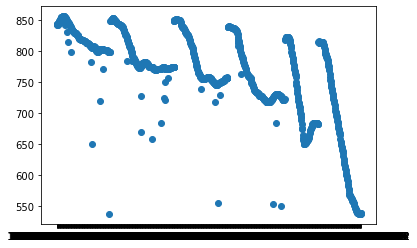

                     X           Y   Pressure   TiltX   TiltY           Time
0     1059.92747430419  842.854833   0.076402 -4257.0   988.0  00:04.5448411
1     1059.92747430419  842.854833   0.076402 -4257.0   988.0  00:04.5604847
2     1060.55941794665  842.960157   0.083482 -4257.0   988.0  00:04.5761906
3     1061.13869961889  842.696847   0.097642 -4257.0   988.0  00:04.5918112
4     1061.40200946992  842.591523   0.132555 -4257.0   988.0  00:04.6073533
...                ...         ...        ...     ...     ...            ...
1096   302.96431458598  537.994688   0.577630 -3054.0  1275.0  00:24.8422234
1097  302.753666705162  538.100012   0.550042 -3054.0  1275.0  00:24.8578573
1098   302.49035685414  538.257997   0.534417 -3054.0  1275.0  00:24.8578573
1099  301.911075181892  538.626631   0.482658 -3054.0  1275.0  00:24.8734813
1100  301.911075181892  538.626631   0.441154 -3054.0  1275.0  00:24.8734813

[1101 rows x 6 columns]

table number: 10



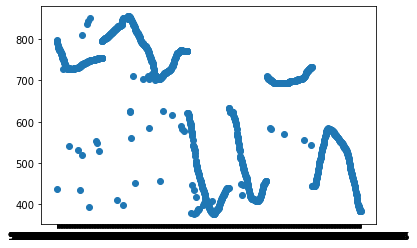

                     X           Y   Pressure   TiltX   TiltY           Time
0     946.388266543481  798.408130   0.186999 -4447.0  1009.0  00:03.4787405
1     946.862224275321  796.512299   0.190906 -4447.0  1009.0  00:03.4943781
2     946.388266543481  794.774454   0.190417 -4199.0   927.0  00:03.5099814
3     945.598336990415  792.404666   0.223133 -4199.0   927.0  00:03.5256250
4     944.439773645918  789.613581   0.266835 -4199.0   927.0  00:03.5412356
...                ...         ...        ...     ...     ...            ...
1224  1050.29033375678  383.905763   0.566400  -535.0  1786.0  00:36.6884413
1225  1050.02702390576  383.695115   0.563470  -535.0  1786.0  00:36.6884413
1226  1050.02702390576  383.695115   0.555657  -535.0  1786.0  00:36.7040728
1227  1049.71105208454  383.589791   0.532219  -535.0  1786.0  00:36.7197060
1228  1048.65781268045  383.853101   0.286366  -535.0  1786.0  00:36.7197060

[1229 rows x 6 columns]

table number: 11



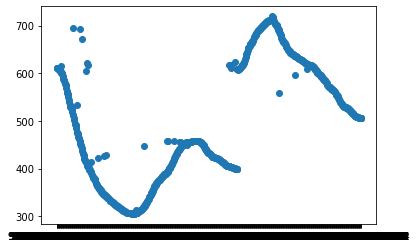

                    X           Y   Pressure   TiltX   TiltY           Time
0    968.558955999538  611.089502   0.113756 -4045.0  1362.0  00:08.4231753
1    968.874927820764  611.142164   0.115709 -4045.0  1362.0  00:08.4388114
2     970.13881510567  611.036840   0.137194 -4045.0  1362.0  00:08.4544339
3    970.402124956692  611.036840   0.207263 -4045.0  1362.0  00:08.4757771
4    970.402124956692  611.036840   0.296376 -4045.0  1362.0  00:08.4914766
..                ...         ...        ...     ...     ...            ...
817  879.033606652038  505.607576   0.625727 -3260.0  1718.0  00:27.5996193
818  879.191592562652  505.449590   0.608148 -3260.0  1718.0  00:27.6153125
819  879.454902413674  505.186280   0.596918 -3260.0  1718.0  00:27.6153125
820  879.454902413674  505.186280   0.586175 -3260.0  1718.0  00:27.6308769
821  879.454902413674  505.186280   0.549798 -3260.0  1718.0  00:27.6308769

[822 rows x 6 columns]

table number: 12



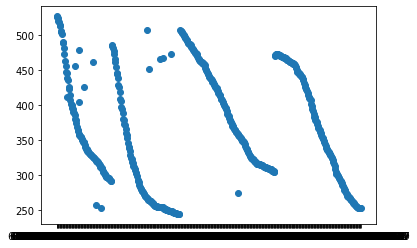

                    X           Y   Pressure   TiltX   TiltY           Time
0    688.818570273704  526.514378   0.071031 -4515.0  2197.0  00:18.1988702
1     688.66058436309  525.724449   0.078355 -4515.0  2197.0  00:18.2144819
2     688.29195057166  523.670632   0.089586 -4515.0  2197.0  00:18.2302213
3    687.607344959002  520.405590   0.152819 -4515.0  2197.0  00:18.2458102
4    686.764753435732  517.719829   0.191394 -4515.0  2197.0  00:18.2613566
..                ...         ...        ...     ...     ...            ...
522  739.216075759326  253.567387   0.705806 -2757.0 -1514.0  00:27.5447703
523  741.164568656889  253.040767   0.697749 -2757.0 -1514.0  00:27.5603600
524  744.008315047927  252.882781   0.682612 -2757.0 -1514.0  00:27.5764537
525  745.324864303037  252.988105   0.672847 -2757.0 -1514.0  00:27.5920828
526  747.852638872849  253.304077   0.630610 -2757.0 -1514.0  00:27.6077052

[527 rows x 6 columns]

table number: 13



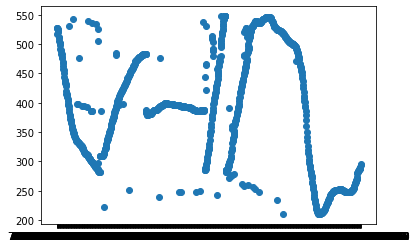

                     X           Y   Pressure   TiltX   TiltY           Time
0     713.411710359164  527.672941   0.290761 -4798.0  2043.0  00:13.4325736
1     713.780344150595  527.462294   0.295644 -4798.0  2043.0  00:13.4481964
2     714.780921584479  526.777688   0.295644 -4798.0  2043.0  00:13.4638099
3     716.782076452246  524.934519   0.208728 -4798.0  2043.0  00:13.4794442
4     717.098048273473  523.775956   0.208728 -4798.0  2043.0  00:13.4950665
...                ...         ...        ...     ...     ...            ...
1198  367.159256265158  291.010047   0.733639 -1988.0  1259.0  00:35.3933225
1199  371.372213881511  293.379836   0.685542 -1988.0  1259.0  00:35.3933225
1200  372.583439196212  294.064442   0.667231 -1988.0  1259.0  00:35.4089803
1201  376.480424991339  296.118258   0.608392 -1988.0  1259.0  00:35.4089803
1202  377.849636216653  296.750202   0.558099 -1988.0  1259.0  00:35.4089803

[1203 rows x 6 columns]

table number: 14



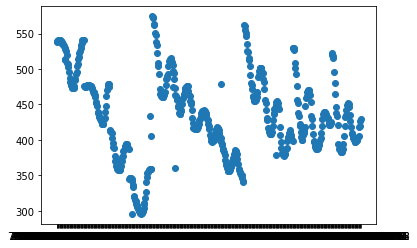

                    X           Y   Pressure   TiltX   TiltY           Time
0    764.441159487239  538.415983   0.198962 -3545.0  -438.0  00:02.2203548
1    756.910497748008  539.363899   0.225086 -3545.0  -438.0  00:02.2359807
2    750.959695114909  539.995842   0.217517 -3545.0  -438.0  00:02.2516036
3    744.903568541402  540.838434   0.215076 -3545.0  -438.0  00:02.2673119
4    738.742118027486  541.154406   0.221912 -3545.0  -438.0  00:02.2673119
..                ...         ...        ...     ...     ...            ...
536  274.842822496824  405.233861   0.500725  -929.0  1642.0  00:12.3433697
537  278.318512530315  418.136043   0.466545  -943.0  1634.0  00:12.3588412
538   278.37117450052  420.295184   0.459709  -943.0  1634.0  00:12.3588412
539  277.686568887862  426.930592   0.437247  -943.0  1634.0  00:12.3588412
540  277.159949185818  429.089733   0.400870  -943.0  1634.0  00:12.3588412

[541 rows x 6 columns]

table number: 15



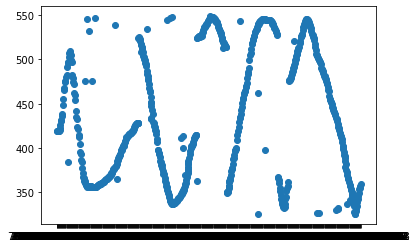

                    X           Y   Pressure   TiltX   TiltY           Time
0    767.864187550525  418.978635   0.045884 -5178.0  2279.0  00:03.4174525
1       768.759441044  418.820649   0.045884 -5178.0  2279.0  00:03.4330757
2    769.391384686453  418.820649   0.060044 -5178.0  2279.0  00:03.4488039
3    770.707933941564  418.820649   0.118151 -5178.0  2279.0  00:03.4644607
4    771.181891673403  419.136621   0.180407 -5178.0  2279.0  00:03.4799573
..                ...         ...        ...     ...     ...            ...
644  580.176925742002  353.835778   0.632074 -3891.0  1408.0  00:18.0949448
645  580.071601801594  354.467721   0.632074 -3891.0  1408.0  00:18.1105679
646  579.966277861185  356.100243   0.632074 -3891.0  1408.0  00:18.1105679
647  579.913615890981  356.942834   0.629877 -3891.0  1408.0  00:18.1419729
648  579.650306039958  359.575933   0.616449 -3891.0  1408.0  00:18.1419729

[649 rows x 6 columns]

table number: 16



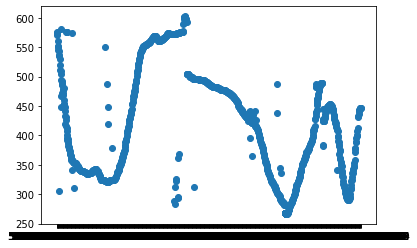

                     X           Y   Pressure   TiltX   TiltY           Time
0     543.471532509528  576.753898   0.045884 -4747.0   -54.0  00:02.0961795
1     544.630095854025  574.752743   0.124010 -4747.0   -54.0  00:02.1118074
2     545.735997228317  571.224391   0.231922 -4747.0   -54.0  00:02.1274907
3     546.473264811179  561.060631   0.278065 -4747.0   -54.0  00:02.1430894
4     545.946645109135  552.371405   0.313222 -4747.0   -54.0  00:02.1430894
...                ...         ...        ...     ...     ...            ...
1083  775.184201408939  445.204296   0.684810 -3750.0   525.0  00:29.5969320
1084  776.184778842823  446.046888   0.684810 -3755.0   445.0  00:29.5969320
1085  776.500750664049  446.310197   0.684810 -3755.0   445.0  00:29.6125461
1086  777.396004157524  446.836817   0.672847 -3758.0   405.0  00:29.6281693
1087  777.869961889364  447.152789   0.660639 -3758.0   405.0  00:29.6438097

[1088 rows x 6 columns]

table number: 17



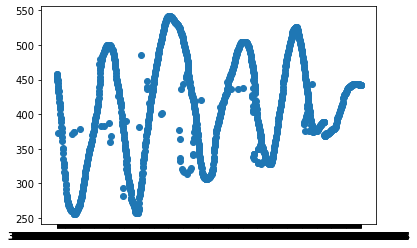

                     X           Y   Pressure   TiltX   TiltY           Time
0     319.710821110983  457.790507   0.306142 -4167.0  -398.0  00:11.1068854
1     320.500750664049  457.369211   0.311025 -4167.0  -398.0  00:11.1234497
2     321.869961889364  454.788775   0.286610 -4175.0   -12.0  00:11.1391633
3     321.869961889364  452.050352   0.302968 -4166.0   415.0  00:11.1547220
4     321.501328097933  450.417831   0.304921 -4161.0   504.0  00:11.1547220
...                ...         ...        ...     ...     ...            ...
1453  765.336412980714  442.623860   0.665522 -1392.0  -806.0  00:31.7422388
1454  765.336412980714  442.623860   0.663569 -1392.0  -806.0  00:31.7578625
1455  765.863032682758  442.676522   0.652827 -1392.0  -806.0  00:31.7735962
1456  766.442314355006  442.781845   0.643549 -1392.0  -806.0  00:31.7735962
1457  766.442314355006  442.781845   0.620111 -1392.0  -806.0  00:31.7735962

[1458 rows x 6 columns]

table number: 18



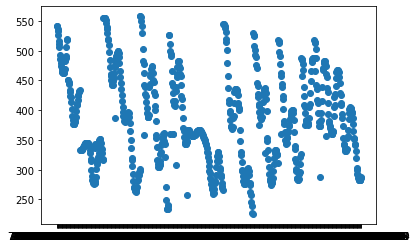

                    X           Y   Pressure   TiltX   TiltY           Time
0    740.163991223005  541.891673   0.326406 -3704.0   449.0  00:27.1614355
1    738.952765908303  541.365054   0.346670 -3704.0   449.0  00:27.1771579
2    733.001963275205  537.099434   0.302480 -3704.0   449.0  00:27.1926912
3    728.104400046195  532.728491   0.304921 -3704.0   449.0  00:27.2083235
4    724.786695923317  526.040420   0.337636 -3704.0   449.0  00:27.2246921
..                ...         ...        ...     ...     ...            ...
713   936.59314008546  282.794780   0.696040 -2006.0  1756.0  00:45.4181263
714  936.066520383416  283.321400   0.676509 -1992.0  1774.0  00:45.4337880
715  930.010393809909  286.849752   0.451652 -1931.0  1841.0  00:45.4337880
716  928.851830465412  287.218385   0.413565 -1914.0  1859.0  00:45.4493780
717  925.060168610694  287.797667   0.302235 -1883.0  1890.0  00:45.4493780

[718 rows x 6 columns]

table number: 19



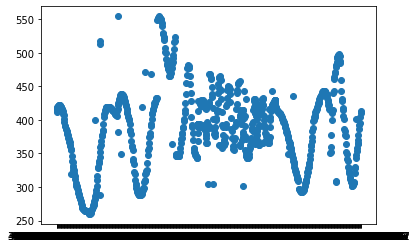

                    X           Y   Pressure   TiltX   TiltY           Time
0    395.702044115949  414.660353   0.117174 -1110.0   385.0  00:06.9130198
1    399.862339762097  417.293452   0.123278 -1110.0   385.0  00:06.9442622
2    404.759902991108  419.241945   0.127184 -1117.0   362.0  00:06.9598894
3     411.23732532625  420.505832   0.035874 -1147.0   246.0  00:06.9755032
4    411.605959117681  420.663818   0.053452 -1147.0   246.0  00:06.9911299
..                ...         ...        ...     ...     ...            ...
872  909.630211340801  394.912115   0.513909 -3326.0  2481.0  00:44.4374619
873  907.892366324056  401.494861   0.491936 -3326.0  2481.0  00:44.4374619
874  907.260422681603  403.706664   0.463859 -3326.0  2481.0  00:44.4530980
875  905.101281903222  410.552720   0.288075 -3326.0  2481.0  00:44.4530980
876  904.206028409747  412.869846   0.161852 -3326.0  2481.0  00:44.4530980

[877 rows x 6 columns]

table number: 20



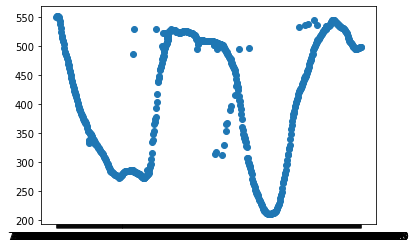

                    X           Y   Pressure   TiltX   TiltY           Time
0     712.41113292528  550.422913   0.290761 -4617.0  2397.0  00:02.4825431
1    712.727104746506  550.580898   0.295644 -4617.0  2397.0  00:02.4981649
2    713.517034299573  550.896870   0.295644 -4617.0  2397.0  00:02.4981649
3    713.938330061208  550.949532   0.278798 -4617.0  2397.0  00:02.5137802
4    715.886822958771  550.422913   0.232654 -4617.0  2397.0  00:02.5343289
..                ...         ...        ...     ...     ...            ...
714  479.855872502598  496.813027   0.681147 -3819.0  1666.0  00:15.5794018
715  482.015013280979  497.181661   0.660395 -3769.0  1638.0  00:15.5794018
716  482.488971012819  497.286985   0.652827 -3769.0  1638.0  00:15.5950274
717   484.17415405936  498.024252   0.603265 -3769.0  1638.0  00:15.5950274
718   484.17415405936  498.024252   0.589837 -3769.0  1638.0  00:15.6106472

[719 rows x 6 columns]

table number: 21



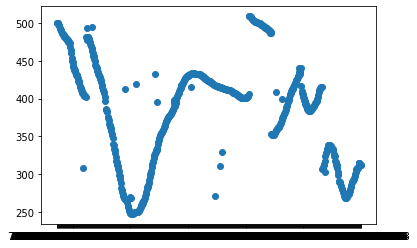

                    X           Y   Pressure   TiltX   TiltY           Time
0    719.415174962467  500.762675   0.321523 -4394.0  1116.0  00:03.8377831
1    720.468414366555  500.867999   0.326650 -4394.0  1116.0  00:03.8534071
2    720.995034068599  500.499365   0.260243 -4394.0  1116.0  00:03.8690233
3    720.415752396351  499.972745   0.270497 -4394.0  1116.0  00:03.8847364
4    718.677907379605  497.866266   0.285389 -4394.0  1116.0  00:03.9003241
..                ...         ...        ...     ...     ...            ...
649    484.6481117912  313.233399   0.202136 -3410.0  2257.0  00:43.2597533
650  484.700773761404  312.496131   0.204822 -3410.0  2257.0  00:43.2763095
651  484.384801940178  312.127497   0.207752 -3410.0  2257.0  00:43.2763095
652   484.17415405936  311.916850   0.207752 -3410.0  2257.0  00:43.2920280
653  482.752280863841  311.179582   0.119860 -3410.0  2257.0  00:43.3075650

[654 rows x 6 columns]


In [135]:
import_tables('7554')
# import_tables('7556')
# import_tables('7557')
# import_tables('7558')
# import_tables('7559')


In [124]:
print(import_tables('7554'))


table number: 1



ValueError: Image size of 531739x458911 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 2 Axes>

                    X           Y   Pressure   TiltX   TiltY           Time
0    925.902760133965  665.541979   0.045884 -4917.0   669.0  00:12.6099853
1    925.902760133965  665.541979   0.045884 -4917.0   669.0  00:12.6256038
2    926.692689687031  665.647303   0.082506 -4917.0   669.0  00:12.6445684
3    927.008661508257  665.647303   0.115953 -4917.0   669.0  00:12.6602735
4    927.324633329484  665.594641   0.140368 -4917.0   669.0  00:12.6838147
..                ...         ...        ...     ...     ...            ...
127  585.495784732648  647.004966   0.378408 -4510.0  1946.0  00:14.0316787
128  584.863841090195  646.846980   0.382803 -4510.0  1946.0  00:14.0472865
129  584.863841090195  646.846980   0.386954 -4510.0  1946.0  00:14.0629098
130  584.653193209377  646.741656   0.386954 -4501.0  1991.0  00:14.0785335
131  584.653193209377  646.741656   0.389151 -4501.0  1991.0  00:14.0941464

[132 rows x 6 columns]

table number: 2



ValueError: Image size of 490309x430823 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 2 Axes>

                    X           Y   Pressure   TiltX   TiltY           Time
0    538.995265042153  793.141933   0.007797 -5564.0  -521.0  00:05.5315422
1    539.153250952766  792.246680   0.007797 -5564.0  -521.0  00:05.5471346
2    539.943180505832  789.929553   0.007797 -5564.0  -521.0  00:05.5627578
3    540.417138237672  789.034300   0.007797 -5564.0  -521.0  00:05.5784554
4    540.733110058898  788.139046   0.007797 -5564.0  -521.0  00:05.5941499
..                ...         ...        ...     ...     ...            ...
242  702.089386765215  601.873657   0.382315 -4986.0   230.0  00:08.3713049
243  702.773992377873  601.347038   0.374258 -4986.0   230.0  00:08.3713049
244  702.773992377873  601.347038   0.371084 -4986.0   230.0  00:08.3869325
245  702.773992377873  601.347038   0.367910 -4986.0   230.0  00:08.4025636
246  702.773992377873  601.347038   0.341299 -4986.0   230.0  00:08.4181763

[247 rows x 6 columns]

table number: 3



ValueError: Image size of 453250x443790 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 2 Axes>

                    X           Y   Pressure   TiltX   TiltY           Time
0    765.705046772145  694.400739   0.057603 -4398.0   693.0  00:07.3360831
1    763.703891904377  697.191824   0.060533 -4398.0   693.0  00:07.3516977
2    762.176694768449  699.561612   0.090806 -4398.0   693.0  00:07.3829451
3     759.80690610925  702.879316   0.154040 -4398.0   693.0  00:07.3986387
4    758.437694883936  704.143204   0.176257 -4398.0   693.0  00:07.4141981
..                ...         ...        ...     ...     ...            ...
223  764.125187666012  709.040767   0.472160 -3801.0   841.0  00:09.7686524
224  762.176694768449  709.462063   0.464347 -3801.0   841.0  00:09.7998921
225  761.544751125996  709.620049   0.452628 -3801.0   841.0  00:09.7998921
226   761.22877930477  709.725372   0.446525 -3801.0   841.0  00:09.8155120
227  759.754244139046  710.199330   0.222889 -3801.0   841.0  00:09.8155120

[228 rows x 6 columns]

table number: 4



ValueError: Image size of 506348x449644 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 2 Axes>

                    X           Y   Pressure   TiltX   TiltY           Time
0    847.805058320822  696.243908   0.058579 -4762.0   723.0  00:07.4715108
1    848.068368171844  696.085922   0.061509 -4762.0   723.0  00:07.4871337
2    848.437001963275  695.769950   0.065415 -4762.0   723.0  00:07.5028896
3    848.437001963275  695.769950   0.086412 -4762.0   723.0  00:07.5183749
4    848.437001963275  695.769950   0.159655 -4762.0   723.0  00:07.5339944
..                ...         ...        ...     ...     ...            ...
404  837.220002309735  702.247373   0.719234 -4148.0   889.0  00:11.9926556
405  837.220002309735  702.510683   0.714351 -4148.0   889.0  00:12.0239232
406  837.220002309735  702.510683   0.708492 -4148.0   889.0  00:12.0395151
407  837.220002309735  701.931401   0.628656 -4148.0   889.0  00:12.0551384
408  836.166762905647  696.191246   0.293935 -4148.0   889.0  00:12.0551384

[409 rows x 6 columns]

table number: 5



ValueError: Image size of 476500x452799 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 2 Axes>

                    X           Y   Pressure   TiltX   TiltY           Time
0    608.351079801363  833.323017   0.107164 -3848.0  -644.0  00:02.7272871
1    608.877699503407  833.165031   0.107164 -3848.0  -644.0  00:02.7429109
2    608.877699503407  833.165031   0.099107 -3848.0  -644.0  00:02.7585749
3     609.03568541402  833.323017   0.107652 -3959.0  -670.0  00:02.7741475
4    608.719713592794  833.586326   0.129381 -4059.0  -694.0  00:02.7898665
..                ...         ...        ...     ...     ...            ...
498  686.132809793279  654.061670   0.507561 -3717.0  1573.0  00:16.4421005
499  686.132809793279  654.061670   0.507561 -3717.0  1573.0  00:16.4578282
500  686.132809793279  654.061670   0.507561 -3717.0  1573.0  00:16.4733589
501  686.132809793279  654.061670   0.490227 -3717.0  1573.0  00:16.4891290
502  686.448781614505  653.903684   0.478019 -3717.0  1573.0  00:16.5046050

[503 rows x 6 columns]

table number: 6



ValueError: Image size of 387980x411364 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 2 Axes>

                     X           Y   Pressure   TiltX   TiltY           Time
0     758.016399122301  569.381222   0.088853 -4282.0  2245.0  00:02.7042668
1     758.069061092505  569.170574   0.108629 -4282.0  2245.0  00:02.7198912
2     758.069061092505  569.170574   0.141833 -4011.0  2058.0  00:02.7355150
3     758.069061092505  569.170574   0.170397 -3961.0  2025.0  00:02.7511401
4     758.069061092505  569.170574   0.186267 -3961.0  2025.0  00:02.7667508
...                ...         ...        ...     ...     ...            ...
1104  779.291835084883  635.577318   0.761227 -3373.0  1415.0  00:15.7094726
1105  779.291835084883  635.577318   0.754391 -3373.0  1415.0  00:15.7251581
1106  779.291835084883  635.577318   0.745113 -3373.0  1415.0  00:15.7251581
1107  779.291835084883  635.577318   0.737301 -3373.0  1415.0  00:15.7408486
1108  779.291835084883  635.577318   0.711910 -3373.0  1415.0  00:15.7564239

[1109 rows x 6 columns]

table number: 7



ValueError: Image size of 403951x534760 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 2 Axes>

                   X           Y   Pressure   TiltX   TiltY           Time
0   571.329714747661  364.894792   0.190661 -3352.0  2845.0  00:02.2408653
1    571.90899641991  364.578820   0.202380 -3352.0  2845.0  00:02.2564937
2   572.909573853794  363.894214   0.237781 -3352.0  2845.0  00:02.2721532
3   573.067559764407  363.736228   0.239979 -3352.0  2845.0  00:02.2878658
4   573.067559764407  363.736228   0.230701 -3352.0  2845.0  00:02.2878658
5    619.77872733572  409.710128   0.260487 -4405.0  2788.0  00:03.0222758
6   620.200023097355  409.288832   0.276600 -4405.0  2788.0  00:03.0378670
7   620.200023097355  409.288832   0.268055 -4276.0  2682.0  00:03.0535995
8   620.200023097355  409.288832   0.277577 -4102.0  2544.0  00:03.0691185
9   620.200023097355  409.288832   0.282460 -4102.0  2544.0  00:03.0847513
10  619.726065365516  408.972861   0.282460 -4102.0  2544.0  00:03.1004349
11  618.936135812449  408.867537   0.207263 -4102.0  2544.0  00:03.1159844
12  667.806444162143  446

ValueError: Image size of 529326x519957 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 2 Axes>

                     X           Y   Pressure   TiltX   TiltY           Time
0     910.472802864072  888.302113   0.094224 -3875.0  -351.0  00:05.8895936
1     910.472802864072  888.302113   0.099107 -3875.0  -351.0  00:05.9052263
2     910.472802864072  888.302113   0.123278 -3875.0  -351.0  00:05.9208500
3     910.472802864072  888.302113   0.129137 -3875.0  -351.0  00:05.9364735
4     909.840859221619  888.460099   0.137926 -3875.0  -351.0  00:05.9521633
...                ...         ...        ...     ...     ...            ...
1178  870.186395657697  822.264003   0.685542 -3761.0   823.0  00:23.7650398
1179  870.449705508719  822.264003   0.685542 -3761.0   823.0  00:23.7650398
1180  870.449705508719  822.264003   0.682368 -3761.0   823.0  00:23.7806749
1181  870.449705508719  822.264003   0.673579 -3761.0   823.0  00:23.7806749
1182  870.713015359741  822.369327   0.644038 -3761.0   823.0  00:23.7806749

[1183 rows x 6 columns]

table number: 9



KeyboardInterrupt: 

In [ ]:
#   filename = folder + 'cat.' + str(i) + '.jpg'

In [ ]:
# animation function - recreation of the drawing

x = df['X']
y = df['Y']

fig = plt.figure()
plt.xlim(df['X'].min()-100 , df['X'].max() + 100)
plt.ylim(df['Y'].min()-100 , df['Y'].max() + 100)
graph, = plt.plot([], [], 'o' ,markersize=8)
plt.gca().invert_yaxis()
def animate(i):
    graph.set_data(x[:i+1], y[:i+1])
    return graph

ani = FuncAnimation(
fig, animate, frames=len(df), interval=10)
plt.show()

# טיוטה

In [2]:
#df = pd.read_csv("task4_train"

In [1]:

# # Import Module
# import os
  
# # Folder Path
# path = "genre_classification.ipynb"
  
# # Change the directory
# os.chdir(path)

In [11]:
from pathlib import Path
entries=Path('genre_classification.ipynb')

In [3]:
# for entry in entries.iterdir():
#     print(entry.name)


In [ ]:
from pathlib import Path

entries = Path('Desktop/semB_project/task4_train/')
for entry in entries.iterdir():
    print(entry.name)


In [ ]:
for folder in path:
    os.chdir(folder)
             
                

In [ ]:
# Read text File 
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        print(f.read())

In [ ]:
# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}\{file}"

In [ ]:
# call read text file function
        read_text_file(file_path)